In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(recipes)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("https://raw.githubusercontent.com/mayakosc/dsci-indv-grp1-maya/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


**1. Data Description**

In [3]:
# summary statistics
summarized_players <- summary(players)

summarized_players

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

**The players dataset contains:**
- 196 observations and 7 variables
- experience (character): player's skill level
- subscribe (logical): whether a player is subscribed or not to the newsletter
- hashedEmail (character): player's hashed email address
- played_hours (numerical): hours of minecraft played by individual
- name (character): individual's name
- gender (character): individual's gender
- Age (numerical): individual's age

**Potential issues to consider:**
- The dataset contains NA values in the Age variable
- Name is not unique and therefore players should be identified using hashedEmail
- Variables such as experience and played hours are self reported and may not be completely accurate
- Most players have quite low played hours

**2. Question**

The broad question I will be addressing is "Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

The specific question I have formulated is "Can a player's age and hours played predict whether a player will subscribe to a game-related newsletter?"

The players dataset includes data on player demographics (age) and engagement (played_hours), and subscription status (subscribe). These data from these variables will help to create a predictive model we can use to determine which players are more likely to subscribe to the newsletter.

To wrangle the data to create my model, I will remove NA values and standardize my values so that all variables are equally considered.

**3. Exploratory Data Analysis and Visualization**

In [4]:
demographics <- players |>
    select(Age, played_hours, subscribe) |>
    filter(!is.na(Age))

demo_recipe <- recipe(subscribe ~ Age + played_hours, data = demographics) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

demo_scaled <- demo_recipe |>  
                           prep() |> 
                           bake(demographics)
demo_scaled

Age,played_hours,subscribe
<dbl>,<dbl>,<lgl>
-1.64271848,0.85603962,TRUE
-0.56012864,-0.07385234,TRUE
-0.56012864,-0.20719534,FALSE
-0.01883372,-0.18263216,TRUE
-0.01883372,-0.20368631,TRUE
-0.56012864,-0.20719534,TRUE
-0.28948118,-0.20719534,TRUE
-0.01883372,-0.20719534,FALSE
3.49958327,-0.20368631,TRUE


This dataset now contains only the variables we are interested in for creating our model, and the data is now standardized so we can properly make predictions.

In [5]:
mean_values <- players |>
    summarize(avg_hours = mean(played_hours), avg_age = mean(Age, na.rm = TRUE))
mean_values

avg_hours,avg_age
<dbl>,<dbl>
5.845918,21.13918


Mean values of numerical variables reported in a singular table

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


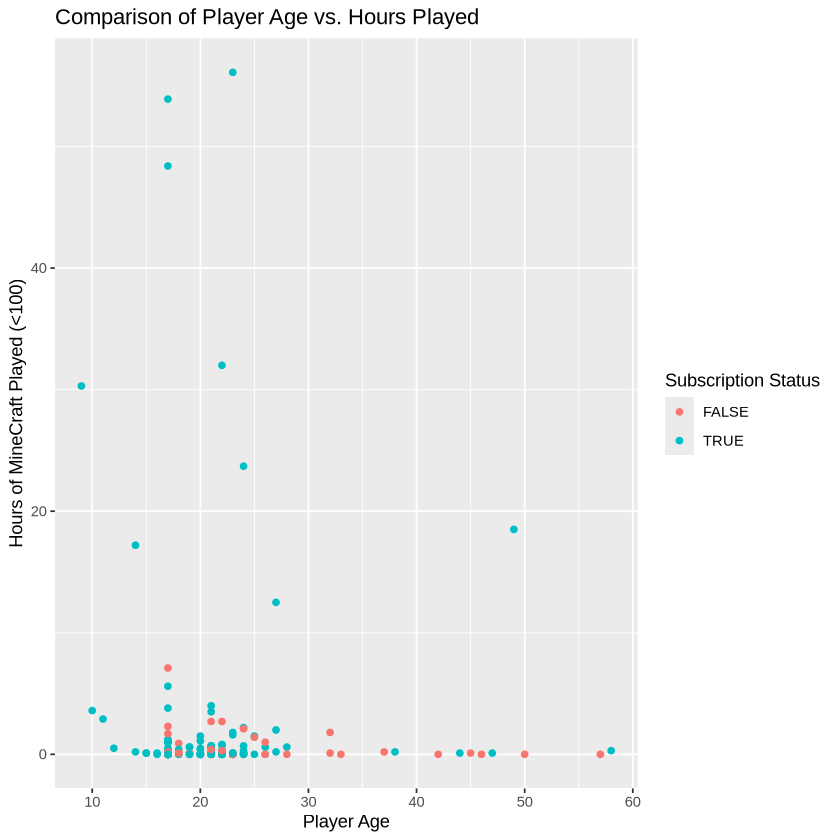

In [6]:
# Make 2 plots
age_vs_hours <- players |>
    filter(played_hours < 100) |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point()+
    labs(x = "Player Age", y = "Hours of MineCraft Played (<100)", color = "Subscription Status", title = "Comparison of Player Age vs. Hours Played")
age_vs_hours

Created a scatterplot showing player age (x-axis) vs. hours played (y-axis), but filtered the hours played to be less than 100 in order to clearly see the trends and exlcude a few outliers, since only a couple players had played more than 100 hours and they were all subscribed.

We can see from this graph that younger players had higher play time hours, and those who had higher hours played were much more likely to be subscribed

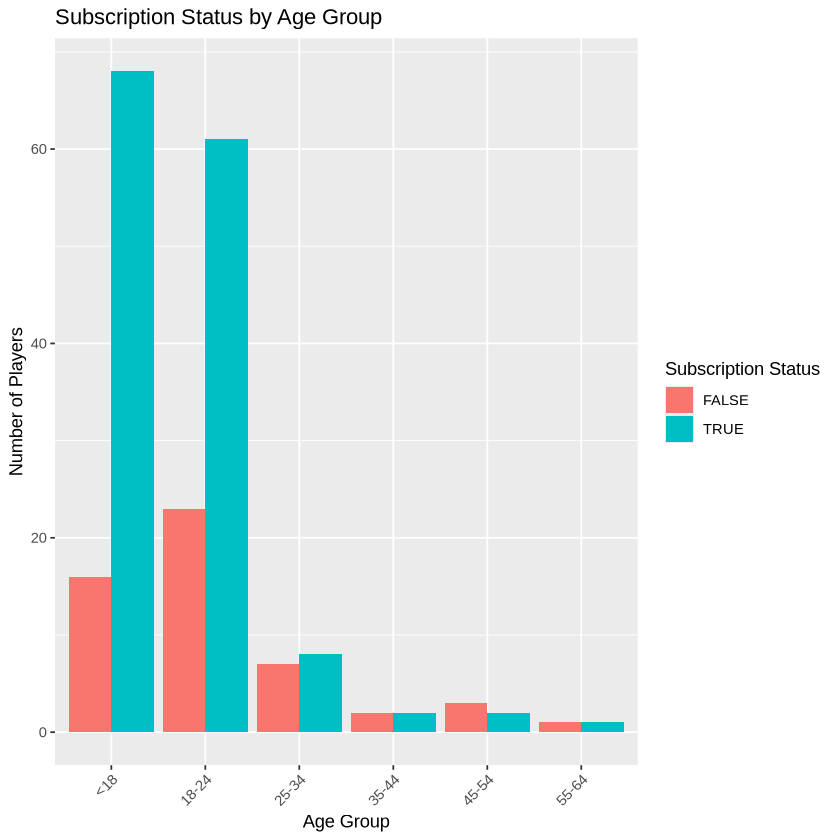

In [7]:
players_age_grp <- players |>
    filter(!is.na(Age)) |>
    mutate(age_group = cut(Age, breaks = c(0, 17, 24, 34, 44, 54, 64), labels = c("<18", "18-24", "25-34", "35-44", "45-54", "55-64")))

sub_histogram <- ggplot(players_age_grp, aes(x = age_group, fill = subscribe))+
    geom_bar(position = "dodge")+
    labs(x = "Age Group", y = "Number of Players", fill = "Subscription Status",
    title = "Subscription Status by Age Group")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

sub_histogram

This histogram shows the distribution of players' ages and whether they are subscribed or not. The graph shows most players are in the younger age groups (>24 years old) and have more players subscribed than in the older age groups. 

**4. Methods and Plan**

Proposed method: KNN Classification
- I have chosen this method because we are trying to predict a class (subscribed or not subscribed)
- - Some assumptions that are required to use this method are that players of the same age/hours played will behave similarly to one another (since we are using nearest neighbours to predict the class of a new observation)
- Potential limitations include choosing a suitable k value; our 